# E-Commerce Sales: Data Cleaning & EDA

In [46]:
import pandas as pd 

sales = pd.read_csv("https://raw.githubusercontent.com/srenna/portfolio/main/1%20-%20Data%20Cleaning/sales_data.csv")
sales.head(10)

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_1,72.87,10.0,2022-01-01
1,Product_40,Region_2,46.19,10.0,2022-01-02
2,Product_1,Region_5,NaN,4.0,2022-01-03
3,Product_6,Region_8,143.47,8.0,2022-01-04
4,Product_44,Region_4,122.54,10.0,2022-01-05
5,Product_21,Region_8,15.76,20.0,2022-01-06
6,Product_31,Region_10,1.60,11.0,2022-01-07
7,NaN,NaN,NaN,11.0,2022-01-08
8,Product_20,Region_8,9.55,8.0,2022-01-09
9,Product_34,Region_1,58.88,NaN,2022-01-10


## Understanding the Data

In [47]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      942 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  943 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


In [48]:
sales.describe(include="all")

,Product,Region,Price,Units Sold,Sale Date
count,947,942,945.000000,943.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_4,Region_5,NaN,NaN,2023-07-31
freq,30,112,NaN,NaN,2
mean,NaN,NaN,108.628011,10.200424,NaN
std,NaN,NaN,167.350086,3.247589,NaN
min,NaN,NaN,0.190000,2.000000,NaN
25%,NaN,NaN,26.420000,8.000000,NaN
50%,NaN,NaN,64.640000,10.000000,NaN
75%,NaN,NaN,142.310000,12.000000,NaN


In [49]:
columns = list(sales.columns)
print(columns)

['Product', 'Region', 'Price', 'Units Sold', 'Sale Date']


Potential issues to be addressed include: (1) Columns with missing values and (2) Data Types - I need to investigate if the format '2023-07-31' will plot correctly in Seaborn / Matplotlib. Numerical data is stored as floats buts Units Sold is best expressed in integer values. Additionally, trailing zeroes for price info are not required. 

In [50]:
# look at the proportion of missing data
print("Missing Values Distribution:")
print(sales.isnull().mean())
print("")

Missing Values Distribution:
Product       0.098095
Region        0.102857
Price         0.100000
Units Sold    0.101905
Sale Date     0.000000
dtype: float64



From the above, we see that the Product, Region, Price and Units Sold are all missing relatively equal amounts of missing data (~10%). No columns can be dropped as they are equally relevant to building the sales strategy. Other than the missing values in the Product column, no variable observations (rows) can be dropped as they independently account for more than 10% of the data set.

Although the missing Product observations are narrowly less than 10% of the data set, to preserve the total sales volume, we will not drop these oberservations and impute the rows using the median which is less sensitive to outliers.  Similar imputation will be conducted for Units Sold. 

To impute categorical variables (i.e. Product and Region), we will fill the missing data with mode. 

The imputation methods above are likely to distort the data but for Assignment 1 considered sufficient by the author. Ideally, linear regression or a more sophisticated technique would be utilized. 

## Imputation

In [51]:
sales['Price'] = sales['Price'].fillna(sales['Price'].median())
sales['Units Sold'] = sales['Units Sold'].fillna(sales['Units Sold'].median())
sales['Product'] = sales['Product'].fillna(sales['Product'].mode().iloc[0])
sales['Region'] = sales['Region'].fillna(sales['Region'].mode().iloc[0])

# check for successful imputation
sales.info()
sales.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     1050 non-null   object 
 1   Region      1050 non-null   object 
 2   Price       1050 non-null   float64
 3   Units Sold  1050 non-null   float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


,Product,Region,Price,Units Sold,Sale Date
0,Product_4,Region_1,72.87,10.0,2022-01-01
1,Product_40,Region_2,46.19,10.0,2022-01-02
2,Product_1,Region_5,64.64,4.0,2022-01-03
3,Product_6,Region_8,143.47,8.0,2022-01-04
4,Product_44,Region_4,122.54,10.0,2022-01-05
5,Product_21,Region_8,15.76,20.0,2022-01-06
6,Product_31,Region_10,1.60,11.0,2022-01-07
7,Product_4,Region_5,64.64,11.0,2022-01-08
8,Product_20,Region_8,9.55,8.0,2022-01-09
9,Product_34,Region_1,58.88,10.0,2022-01-10


## Data Types

In [52]:
sales['Units Sold'] = sales['Units Sold'].astype(int)
sales['Sale Date'] = pd.to_datetime(sales['Sale Date'])
sales['Price'] = sales['Price'].round(decimals=2)

sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Product     1050 non-null   object        
 1   Region      1050 non-null   object        
 2   Price       1050 non-null   float64       
 3   Units Sold  1050 non-null   int32         
 4   Sale Date   1050 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int32(1), object(2)
memory usage: 37.0+ KB


## Insights

In [53]:
import seaborn as sns 
import matplotlib.pyplot as plt

# add column 'Revenue'
sales['Revenue'] = sales['Price'] * sales['Units Sold']

# add columns Year and Month
sales['Year'] = sales['Sale Date'].dt.year
sales['Month'] = sales['Sale Date'].dt.month

# add columns Product No. and Region No. for graphing labels
sales['Product No.'] = sales['Product'].str.split('_', expand=True)[1].astype(int)
sales['Region No.'] = sales['Region'].str.split('_', expand=True)[1].astype(int)


In [54]:
# show the total revenue generated and of the by the products 
best_at = sales.groupby(['Product No.'])['Revenue'].sum().reset_index()
best_at_sorted = best_at.sort_values(by='Revenue', ascending=False).reset_index()
best_at_sorted.drop('index', axis=1, inplace=True)

test = sales.groupby(['Product No.', 'Year'])['Revenue'].sum().reset_index()
ind = best_at_sorted['Product No.']
pivot_table = test.pivot_table(index='Product No.', columns='Year', values='Revenue', aggfunc="sum")
pivot_table.head()


Year,2022,2023,2024
Product No.,,,
1,9441.72,9641.12,2652.64
2,5537.16,9130.14,1167.49
3,1459.02,16479.03,3731.59
4,55643.23,81180.47,31875.17
5,5576.93,2899.56,2656.13


In [55]:
pivot_table = pivot_table.reindex(ind)
pivot_table.head()

Year,2022,2023,2024
Product No.,,,
4,55643.23,81180.47,31875.17
34,5641.84,43934.19,4357.42
49,23103.67,9425.35,8745.93
50,10924.19,18001.30,10339.47
27,5613.65,26904.58,4227.32


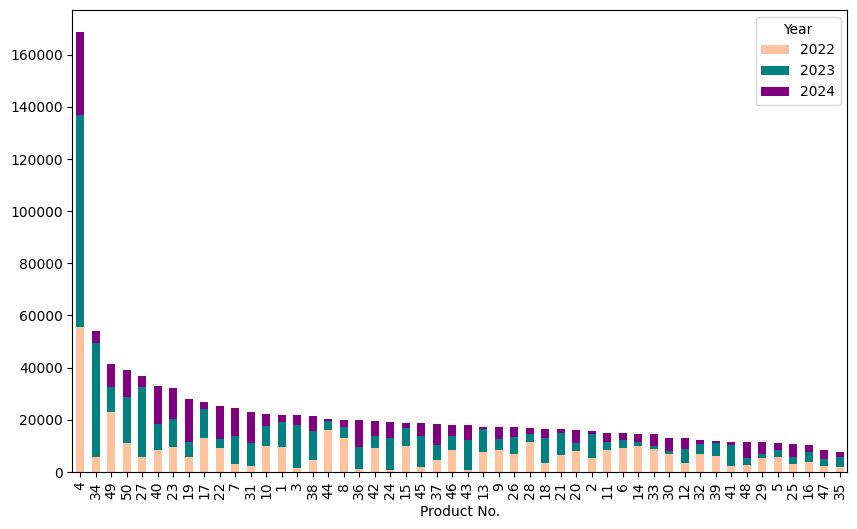

In [56]:
fig, ax = plt.subplots(figsize=(10, 6))
pivot_table.plot.bar(stacked=True, ax=ax, color=['#FFC3A0', '#008080', '#800080'])
plt.show()

From the graph above, we can assess the best-selling and worst-selling products of all time. We recall that that Product_4 was the product selected for imputation so we expect the the sales performanced may be exaggerated. We can also quickly assess which years were better for each product. For example, Product_34 is the second best-selling of all-time but it performed much better in 2023 than 2022. 

Next, we will assess the top performing products by region. 

In [57]:
prod_reg = sales.groupby(['Product No.', 'Region No.'])['Revenue'].sum().reset_index()
prod_reg_sort = prod_reg.sort_values(by=["Region No.","Revenue"], ascending=[True, False])
top_10_region = prod_reg_sort.groupby('Region No.').head(10).reset_index()
top_10_region.drop(columns='index', inplace=True)


In [58]:
top_10_region.head(20)

,Product No.,Region No.,Revenue
0,4,1,7560.88
1,14,1,7420.20
2,33,1,4536.02
3,15,1,4267.54
4,19,1,4145.66
5,10,1,3635.94
6,12,1,3595.28
7,45,1,3587.80
8,37,1,3406.40
9,31,1,3354.08


c:\Users\Sabrina\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3201: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


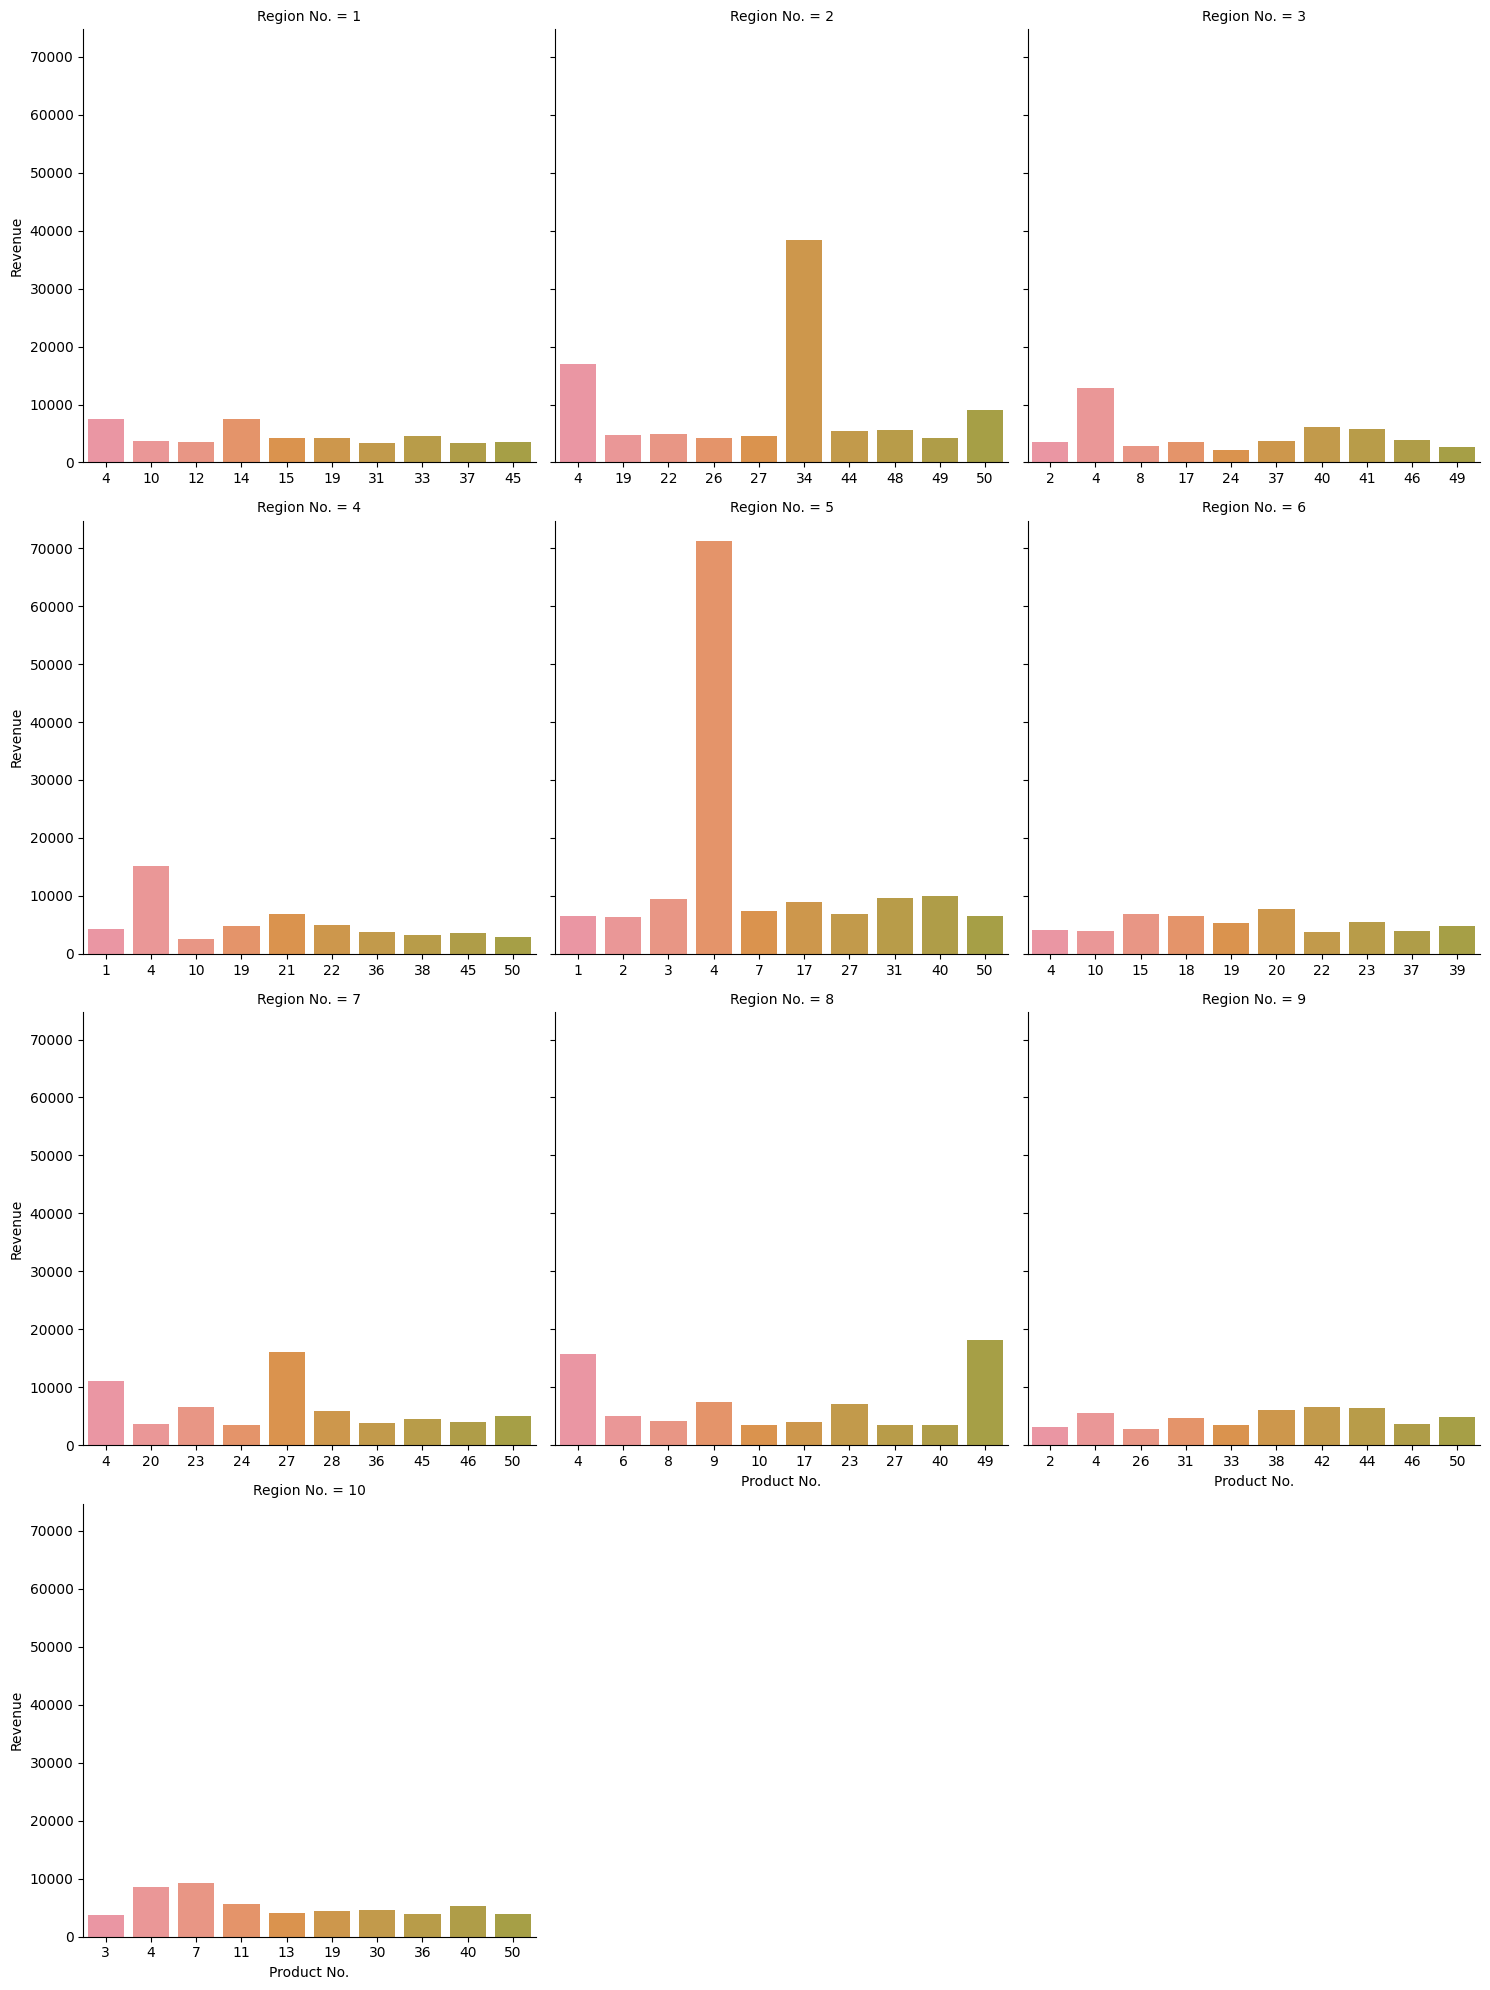

In [116]:
sns.catplot(x="Product No.", y="Revenue", data=top_10_region, kind='bar', col='Region No.', col_wrap = 3, sharex = False)
plt.show()

Despite my limitations in graphing, each plot shows the top-10 best selling products of all-time by region. Each region has its own product demands and our company should consider catering to the specific needs of each region. Below is a table of best sellers by region. Outside of Product_4 dominating many regions, there is significant demand for Product_34 in Region_2, Product_49 in Region_8 and Product_27 in Region_7.

In [117]:
bestseller_region = prod_reg_sort.groupby('Region No.').head(1).reset_index()
bestseller_region = bestseller_region[['Region No.', 'Product No.', 'Revenue']]
print(bestseller_region)

   Region No.  Product No.   Revenue
0           1            4   7560.88
1           2           34  38341.30
2           3            4  12842.24
3           4            4  15082.33
4           5            4  71157.84
5           6           20   7723.29
6           7           27  16176.46
7           8           49  18144.00
8           9           42   6597.40
9          10            7   9215.83


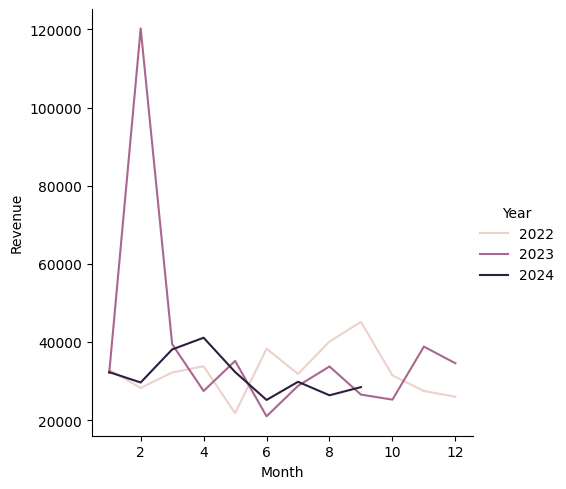

In [118]:
# annual sales performance by month
bymonth = sales.groupby(['Year', 'Month'])['Revenue'].sum().reset_index()
sns.relplot(x="Month", y='Revenue', data = bymonth, kind = 'line', errorbar = None, hue = 'Year')
plt.show()

We see an unusually high volume of sales in February of 2023. There are no real trends for peak sales seasons in the data. 

In [119]:
# annual revenue 
arev = sales.groupby('Year')['Revenue'].sum().reset_index()
arev.rename(columns={"":"Annual Revenue"}, inplace=True)
arev.head()

,Year,Revenue
0,2022,388935.67
1,2023,462858.01
2,2024,283093.58


Annual revenue for 2024 appears to end in September and cannot be compared. In general, we see that 2023 was a more profitable year thatn 2022. 

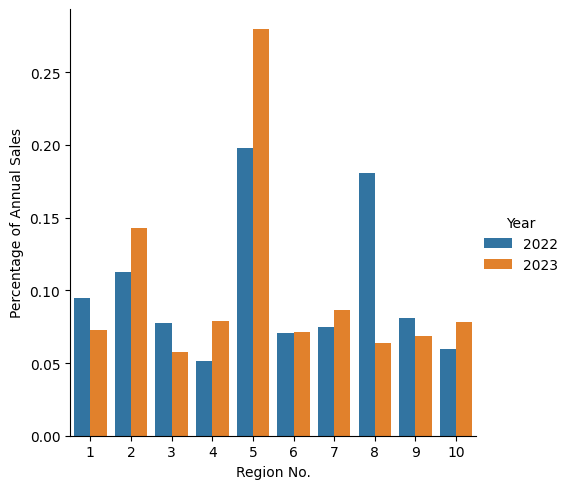

In [120]:
# best performning regions by year by proportionate share of annual sales
norm = sales.merge(arev, on='Year', how = 'left')
norm.rename(columns={'Revenue_y':'Annual'}, inplace=True)
norm['Percentage of Annual Sales'] = norm['Revenue_x'] / norm['Annual']
norm.drop(columns=['Product', 'Region', 'Price', 'Units Sold', 'Sale Date', 'Annual'], inplace=True)

# 2024 data ends in Sept 2024 therefore cannot be compared by annual volume to 2022 and 2023 
annual_sales = norm[norm['Year']!= 2024]
byyear = annual_sales.groupby(['Region No.', 'Year'])['Percentage of Annual Sales'].sum().reset_index()
sns.catplot(x = 'Region No.', y = 'Percentage of Annual Sales', data = byyear, kind = 'bar', errorbar=None, hue = 'Year')
plt.show()

As we know from our preliminary statistics, Region 5 is the top-selling region. Because of the nature of our imputation, we know that this result is exaggerated. Region 2 and 7 are emerging markets for our company. 